# Sparse Hebbian Learning : testing two different learning rates strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'learning-rates'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HAP',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 256) - done in 0.44s.


## fixed learning rate

loading the dico called : /tmp/data_cache/learning-rates_fixed_dico.pkl


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


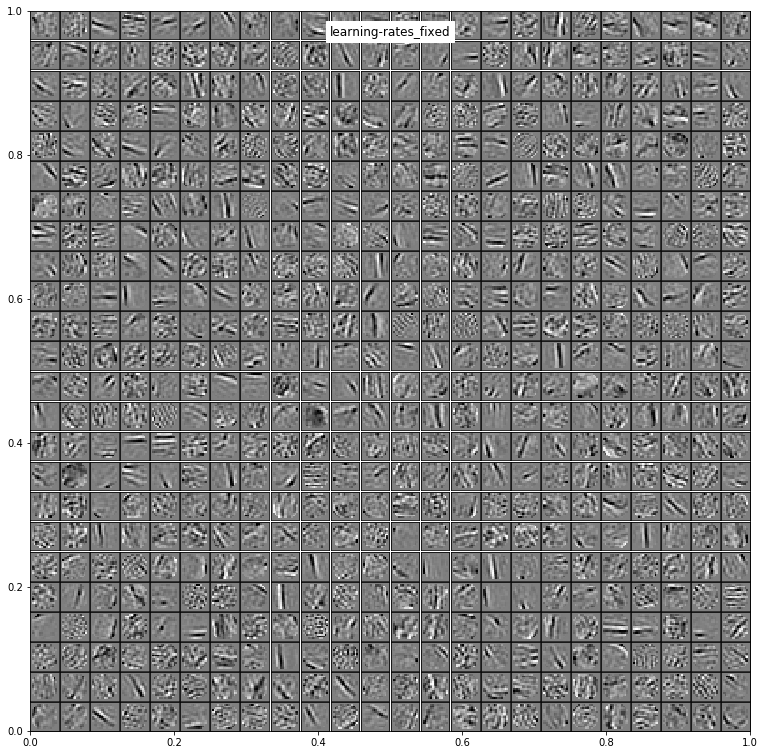

In [ ]:
matname = tag + '_fixed'
shl = SHL(eta=0.01, **opts)
dico_fixed = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## ADAM

See https://arxiv.org/pdf/1412.6980.pdf

In [ ]:
matname = tag + '_ADAM'
shl = SHL(eta=dict(eta=.002, beta1=.9, beta2=.999, epsilon=1.e-8), **opts)
dico_adam = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

No cache found /tmp/data_cache/learning-rates_ADAM_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... Iteration   0 /   4096 (elapsed time:   1s,  0.0mn)
Iteration  410 /   4096 (elapsed time:  5361s,  89.0mn)
Iteration  820 /   4096 (elapsed time:  9080s,  151.0mn)
Iteration  1230 /   4096 (elapsed time:  12475s,  207.0mn)
Iteration  1640 /   4096 (elapsed time:  16024s,  267.0mn)
Iteration  2050 /   4096 (elapsed time:  20402s,  340.0mn)
Iteration  2460 /   4096 (elapsed time:  23720s,  395.0mn)


In [ ]:
for variable in ['error', 'qerror']:
    fig_error, ax_error = None, None
    fig_error, ax_error = shl.time_plot(dico_fixed, variable='error', fig=fig_error, ax=ax_error, color='blue', label='fixed')
    fig_error, ax_error = shl.time_plot(dico_adam, variable='error', fig=fig_error, ax=ax_error, color='red', label='adam')
    ax_error.set_ylim((0, .65))
    ax_error.legend(loc='best')
    plt.show();